25.0
(579, 750)
(560, 750)


In [62]:
import os
import pickle

print('>> train')
with open('C:\\Users\\ysk00\\fingervein\\pickle2\\train.p4', mode='rb') as f:
    trainDict = pickle.load(f)

train_X = trainDict['freqdomain']
train_y = trainDict['label'].ravel()
print(train_X.shape)
print(train_y.shape)

print()
print('>> test')
with open('C:\\Users\\ysk00\\fingervein\\pickle2\\test.p4', mode='rb') as f:
    testDict = pickle.load(f)

test_X = testDict['freqdomain']
test_y = testDict['label'].ravel()
print(test_X.shape)
print(test_y.shape)

>> train
(579, 750)
(579,)

>> test
(560, 750)
(560,)


In [63]:
import numpy as np


# band-pass 구간 설정
#low = 0.7
#high = 4.0

N = 750 # 신호 길이
fps = 30.0 # 프레임율
T = N / fps # 구간 거리

print('==========')
print(T)
print('==========')

#print('low: ', int(low*T))
#print('high: ', int(high*T))
print('==========')

## Set zeros less than 0.7Hz or greater than 4.0Hz
# train_X1 = train_X[:,int((1.0)*T):int((3.0)*T)]     # first
# test_X1 = test_X[:,int((1.0)*T):int((3.0)*T)]

train_X = train_X[:,:]     # first
test_X = test_X[:,:]

# train_X2 = train_X[:,:int((3.0)*T)]     # second
# test_X2 = test_X[:,:int((3.0)*T)]

# train_X3 = train_X[:,int((0.8)*T):int((1.34)*T)]     #third
# test_X3 = test_X[:,int((0.8)*T):int((1.34)*T)]

# train_X2 = train_X[:,int(low*T):int(high*T)]
# test_X2 = test_X[:,int(low*T):int(high*T)]

# train_X2 = train_X
# test_X2 = test_X

# train_X2 = train_X[:,int(low*T):]
# test_X2 = test_X[:,int(low*T):]

# train_X3 = train_X[:,int((0.3)*T):int(high*T)]
# test_X3 = test_X[:,int((0.3)*T):int(high*T)]

print(train_X1.shape)
print(test_X1.shape)
print('==========')
# print(train_X2.shape)
# print(test_X2.shape)
# print('==========')
# print(train_X3.shape)
# print(test_X3.shape)

# test_X5 = test_X1[168:,:]


#for i in range(171):
#    print(i)
#    print(test_X5[i])

25.0
(579, 750)
(560, 750)


In [64]:
import numpy as np
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X.shape)
print(test_X.shape)

(579, 750)
(560, 750)


In [65]:
from tensorflow.keras import layers, models

class DNN(models.Sequential):
    def __init__(self, Nout):
        super().__init__()

        #self.add(layers.Dense(100, activation='relu', input_shape=(750,), name='Hidden-1'))
        self.add(layers.Dense(50, activation='relu', name='Hidden-2'))
        self.add(layers.Dense(Nout, activation='sigmoid'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Train on 28 samples, validate on 551 samples
Epoch 1/10
28/28 [==============================] - 2s 79ms/sample - loss: 0.6223 - accuracy: 1.0000 - val_loss: 0.4860 - val_accuracy: 1.0000
Epoch 2/10
28/28 [==============================] - 1s 47ms/sample - loss: 0.4545 - accuracy: 1.0000 - val_loss: 0.2905 - val_accuracy: 1.0000
Epoch 3/10
28/28 [==============================] - 1s 48ms/sample - loss: 0.2848 - accuracy: 1.0000 - val_loss: 0.1637 - val_accuracy: 1.0000
Epoch 4/10
28/28 [==============================] - 1s 50ms/sample - loss: 0.1611 - accuracy: 1.0000 - val_loss: 0.0978 - val_accuracy: 1.0000
Epoch 5/10
28/28 [==============================] - 1s 48ms/sample - loss: 0.0912 - accuracy: 1.0000 - val_loss: 0.0653 - val_accuracy: 1.0000
Epoch 6/10
28/28 [==============================] - 1s 47ms/sample - loss: 0.0559 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 7/10
28/28 [==============================] - 1s 46ms/sample - loss: 0.0374 - accuracy: 1.0

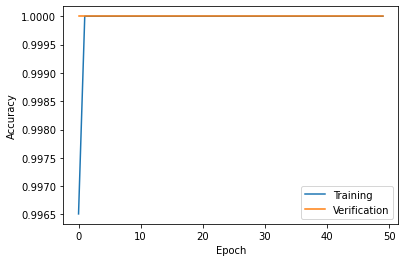

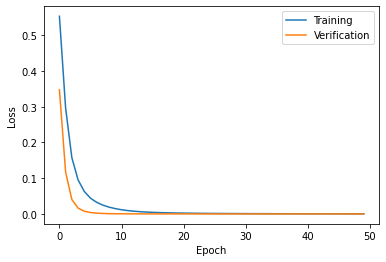

In [75]:
import tensorflow as tf
from ex2_1_ann_mnist_cl import plot_loss, plot_acc
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#def main():
number_of_class = 2
Nout = number_of_class

model = (DNN(Nout))
    
#history = model.fit(train_X, train_y, epochs=50, batch_size=16, validation_split=0.01)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')
]
model.fit(train_X, train_y, epochs=10, callbacks=my_callbacks, batch_size = 1, validation_split=0.95)

#     performance_test = model.evaluate(test_X, test_y, batch_size=1)
#     print('Test Loss and Accuracy -> ', performance_test)
    
#     predict=model.evaluate(test_X, test_y, batch_size=10)
#     PREDICTED_CLASSES = model.predict(test_X, batch_size=10, verbose=1)
#     temp = sum(test_y == PREDICTED_CLASSES)
#     temp/len(test_y)
#     print("predict accuracy:",temp/len(test_y))

plot_acc(history)
plt.show()
plot_loss(history)
plt.show()
    
    
# if __name__ == '__main__':
#     main()


In [73]:
performance_test = model.evaluate(test_X, test_y, batch_size=1)
print('Test Loss and Accuracy -> ', performance_test)


560/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Loss and Accuracy ->  [0.04131548693238449, 1.0]
